## Lab 6 (Image Processing using Convolutional Neural Networks)
- CIFAR10 dataset (see https://www.cs.toronto.edu/~kriz/cifar.html for more info)
- 60K images: 50K train, 10K test
- 10 classes: 'plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
- Perform multi-class classification with evaluation accuracy on EACH class

**CONNECT TO GPU** before continuing, but just CPU is also fine, it might be a bit slow.


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Hyper parameters
num_epochs = 4
batch_size = 4
learning_rate = 0.001

# Download and prepare dataset
# Transform them to tensors and normalise them
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     ])

# 2.2 Download data 
train_set = torchvision.datasets.CIFAR10("./", train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10("./", train=False, download=True, transform=transform)

# 2.3 Use DataLoader to get batches and shuffle
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Q1. Why are there 3 values in each list of the Normalize() function? What do they represent?
# B/c CIFAR10 dataset is a set of 'colored' image, we need 3 channels to display the image; red, green, blue.
# Each value represents the mean and standard deviation of three channels(red, green, blue) to normalize.

cuda


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


### Inspect the Images

In [2]:
# Access the first data sample in the train_set using next(iter())
batch = next(iter(train_loader))
print(f'Image values: \n{batch}')
print(f'Length: {len(batch)}')
print(f'Type: {type(batch)}')

# This means the data contains image-label pairs
# Unpack them
images, labels = batch
# Same as these two lines:
# image = batch[0]
# label = batch[1]


print(images.shape)
print(labels)

# Q2. What is the range of the values for the normalised image pixels?
# About -1 to 1.

# Q3. What does each index value of the shape of the image represent?
# [batch_size, the number of channels, the number of height pixels, the number of width pixels]

# Q4. What do the label values represent?
# Each batch contains 4 images, the label values represent  

Image values: 
[tensor([[[[ 0.5451,  0.5373,  0.5451,  ...,  0.5059,  0.4980,  0.4902],
          [ 0.5765,  0.5686,  0.5765,  ...,  0.5529,  0.5529,  0.5451],
          [ 0.6235,  0.6157,  0.6157,  ...,  0.6314,  0.6314,  0.6235],
          ...,
          [ 0.0275,  0.0980,  0.1373,  ...,  0.4353,  0.4431,  0.2314],
          [ 0.0039,  0.0431,  0.1294,  ...,  0.1608,  0.0431, -0.0980],
          [ 0.0431,  0.0196,  0.0510,  ...,  0.0745,  0.0118, -0.0510]],

         [[ 0.7647,  0.7569,  0.7569,  ...,  0.7098,  0.7098,  0.7020],
          [ 0.7725,  0.7647,  0.7647,  ...,  0.7255,  0.7255,  0.7176],
          [ 0.7961,  0.7804,  0.7882,  ...,  0.7804,  0.7647,  0.7647],
          ...,
          [ 0.2784,  0.3098,  0.3176,  ...,  0.2863,  0.3176,  0.2314],
          [ 0.2784,  0.3098,  0.3490,  ...,  0.2392,  0.1843,  0.0902],
          [ 0.3098,  0.2706,  0.2471,  ...,  0.1922,  0.1686,  0.1294]],

         [[ 0.9373,  0.9294,  0.9294,  ...,  0.8980,  0.8902,  0.8902],
          [ 0.

### View some images
- Note that images have been normalised and may not look very clear

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


class labels: tensor([4, 5, 9, 9])


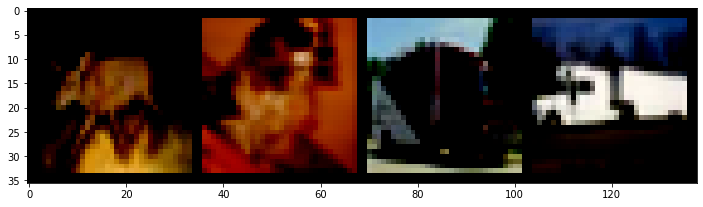

In [ ]:
# Create a grid 
plt.figure(figsize=(12,12))
grid = torchvision.utils.make_grid(tensor=images, nrow=4) # nrow = number of images displayed in each row

print(f"class labels: {labels}")

# Use grid.permute() to transpose the grid so that the axes meet the specifications required by 
# plt.imshow(), which are [height, width, channels]. PyTorch dimensions are [channels, height, width].
plt.imshow(grid.permute(1,2,0))

## CNN model

In [ ]:
class Test(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5, padding = 1)
    self.relu = nn.ReLU()
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5) 
    # flatten 3D tensor to 1D tensor
    self.fc1 = nn.Linear(5*5*16, 128) # Q8. Fill out the correct input dimensions 
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10) # final output matches num_classes

  def forward(self, x):
    # Conv + ReLU + pool
    print(f'Input shape: {x.shape}')
    out = self.conv1(x)
    print(f'After Conv1: {out.shape}')
    print(f'Padding: {self.conv1.padding}')
    out = self.pool(F.relu(out))
    print(f'After Pool1: {out.shape}')
    out = self.conv2(out)
    print(f'After Conv2: {out.shape}')
    out = self.pool(F.relu(out))
    print(f'After Pool2: {out.shape}')
    # Flatten it before fc1
    out = out.reshape(-1, 5*5*16) # Q8. Fill out the correct dimension after -1
    print(f'Before fc1: {out.shape}')
    out = self.fc1(out)
    out = self.relu(out)
    print(f'After fc1: {out.shape}')
    out = self.fc2(out)
    out = self.relu(out)
    print(f'After fc2: {out.shape}')
    out = self.fc3(out) # NO softmax as it will be included in CrossEntropyLoss
    print(f'After fc3: {out.shape}')
    return out


model = Test().to(device)
# Let's view the softmax output
probs = nn.Softmax(dim=1)


# Q5. What do the three arguments of the first convolutional layer, conv1 represent (3,6,5)? 
# in_channels : 5 
# out_channels : 6
# filter size : 5x5

# Q6. Explain the arguments of the second convolutional layer, conv2 (6, 16, 5) 
# in_channels : 6 (b/c the first conv layer has 6 out channels)
# out_channels : 16
# filter size : 5x5

# Q7. Figure out the convolved image size after conv1
# Convolved image size = ((input_width - filter_size + 2 * padding) / stride) + 1
# 28*28 (with channel size : 6) (before pooling)

# Q8. Figure out the input size to the first fcn layer and fill out the code above in init() and forward()
# 8*8*16

### Run through a sample batch

In [ ]:
sample = next(iter(train_loader))

images, labels = sample

images = images.to(device)
labels = labels.to(device)

output = model(images)
print(f'Output shape: {output.shape}')
print(f'Softmax outputs:\n {probs(output)}')


# Q9. Explain the shape of the output after conv1
# [batch_size = 4, channels = 6, height = 28, width = 28]

# Q10. What does the pooling do to the dimensions of the feature images here?
# Pooling shrinkes the image into half

# Q11. Add padding=1 to conv1 and rerun the last two code cells. How did padding affect the dimensions of the feature images?
# After adding `padding = 1`, the shape of the output after conv1 was less shrunk.
# Before adding padding = 1 : [28,28], After adding padding = 1 : [30,30]
# B/c padding parameter add a zero vector(in case of zero padding) around the image, the shape of image before conv1 was changed to [34,34]

# Q12. What is represented by each list returned by Softmax outputs?
# Each list means that the probability of belonging to each label
# For example, first element of this list [0.0857, 0.0892, 0.0980, 0.1064, 0.1139, 0.1086, 0.1146, 0.0891, 0.0899, 0.1046]
# means the first input image in this model has a probability 0.0857 of belonging to label 1.


Input shape: torch.Size([4, 3, 32, 32])
After Conv1: torch.Size([4, 6, 30, 30])
Padding: (1, 1)
After Pool1: torch.Size([4, 6, 15, 15])
After Conv2: torch.Size([4, 16, 11, 11])
After Pool2: torch.Size([4, 16, 5, 5])
Before fc1: torch.Size([4, 400])
After fc1: torch.Size([4, 128])
After fc2: torch.Size([4, 64])
After fc3: torch.Size([4, 10])
Output shape: torch.Size([4, 10])
Softmax outputs:
 tensor([[0.0857, 0.0892, 0.0980, 0.1064, 0.1139, 0.1086, 0.1146, 0.0891, 0.0899,
         0.1046],
        [0.0856, 0.0899, 0.0978, 0.1062, 0.1141, 0.1080, 0.1142, 0.0885, 0.0908,
         0.1049],
        [0.0865, 0.0901, 0.0972, 0.1053, 0.1154, 0.1100, 0.1135, 0.0878, 0.0901,
         0.1040],
        [0.0850, 0.0901, 0.0971, 0.1070, 0.1152, 0.1085, 0.1143, 0.0879, 0.0897,
         0.1052]], device='cuda:0', grad_fn=<SoftmaxBackward>)



### Let's Train!
- Now that we know and understand how CNNs work, let's put everything together for CIFAR-10 dataset
  - Download the data in batches and normalisation with shuffling
  - Build a model with 2 CNN layers containing ReLU and pooling
  - Passing the feature images to 3 fully connected layers (FCNs) also containing RELU activation
  - The final layer has 10 units to reprsent the number of output classes
  - Use Binary Cross Entropy Loss and SGD optimiser
  - Evaluate the model on the test data on EACH class

**IMPORTANT!** Fill out the missing code below before training 

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.relu = nn.ReLU()
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5) 
    # flatten 3D tensor to 1D tensor
    self.fc1 = nn.Linear(5*5*16, 128) # TODO
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10) # final output matches num_classes

  def forward(self, x):
    # Conv + ReLU + pool
    out = self.pool(F.relu(self.conv1(x)))
    out = self.pool(F.relu(self.conv2(out)))
    # Flatten it before fc1
    out = out.reshape(-1, 5*5*16) # TODO
    out = F.relu(self.fc1(out))
    out = F.relu(self.fc2(out))
    out = self.fc3(out) # NO softmax as it will be included in CrossEntropyLoss
    return out


model = CNN().to(device)

# Hyper parameters
num_epochs = 4
batch_size = 4
learning_rate = 0.001

# Q13. Use the Cross Entropy Loss for this task (UNCOMMENT & COMPLETE CODE BELOW)
criterion = nn.CrossEntropyLoss()

# Q14. Use the Stochastic Gradient Descent (SGD) optimiser, this time ADD momentum=0.9 (UNCOMMENT & COMPLETE CODE BELOW)
opt = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum=.9)

## Training loop

In [ ]:
n_total_steps = len(train_set)
n_iterations = -(-n_total_steps // batch_size) # ceiling division

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    #print(images.shape) # [4,3,32,32] batch size, channels, img dim
    images = images.to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # Backward pass and Optimise
    opt.zero_grad()
    loss.backward()
    opt.step()

    # Print
    if (i+1) % 1000 == 0:
      print(f'Epoch {epoch+1}/{num_epochs}, Iteration {i+1}/{n_iterations}, Loss={loss.item():.4f} ')



/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 1/10, Iteration 1000/5000, Loss=2.1549 
Epoch 1/10, Iteration 2000/5000, Loss=1.8050 
Epoch 1/10, Iteration 3000/5000, Loss=1.0686 
Epoch 1/10, Iteration 4000/5000, Loss=0.9167 
Epoch 1/10, Iteration 5000/5000, Loss=1.5034 
Epoch 2/10, Iteration 1000/5000, Loss=0.4046 
Epoch 2/10, Iteration 2000/5000, Loss=1.2748 
Epoch 2/10, Iteration 3000/5000, Loss=0.7201 
Epoch 2/10, Iteration 4000/5000, Loss=0.6207 
Epoch 2/10, Iteration 5000/5000, Loss=1.0794 
Epoch 3/10, Iteration 1000/5000, Loss=1.1434 
Epoch 3/10, Iteration 2000/5000, Loss=0.9477 
Epoch 3/10, Iteration 3000/5000, Loss=0.8440 
Epoch 3/10, Iteration 4000/5000, Loss=0.4244 
Epoch 3/10, Iteration 5000/5000, Loss=0.7759 
Epoch 4/10, Iteration 1000/5000, Loss=0.3625 
Epoch 4/10, Iteration 2000/5000, Loss=0.8569 
Epoch 4/10, Iteration 3000/5000, Loss=0.6202 
Epoch 4/10, Iteration 4000/5000, Loss=0.4490 
Epoch 4/10, Iteration 5000/5000, Loss=0.8660 
Epoch 5/10, Iteration 1000/5000, Loss=0.6655 
Epoch 5/10, Iteration 2000/5000, L

## Evaluation

In [ ]:
# Deactivate the autograd engine to reduce memory usage and speed up computations (backprop disabled).
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]


  # Loop through test set
  for images, labels in test_loader:
    # Put images on GPU
    images = images.to(device)
    labels = labels.to(device)
    # Run on trained model
    outputs = model(images) 

    # Get predictions
    # torch.max() returns actual probability value (ignored) and index or class label (selected)
    _, y_preds = torch.max(outputs, 1)
    n_samples += labels.size(0) # different to FFNN
    n_correct += (y_preds == labels).sum().item()

    # Keep track of each class
    for i in range(batch_size):
      label = labels[i]
      pred = y_preds[i]
      if (label == pred):
        n_class_correct[label] += 1
      n_class_samples[label] += 1

  # Print accuracy
  acc = 100.0 * n_correct / n_samples
  print(f'Test Accuracy of the WHOLE CNN = {acc} %')

  for i in range(len(classes)):
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {classes[i]}: {acc} %')


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Test Accuracy of the WHOLE CNN = 65.37 %
Accuracy of plane: 70.5 %
Accuracy of car: 79.5 %
Accuracy of bird: 52.9 %
Accuracy of cat: 40.0 %
Accuracy of deer: 61.9 %
Accuracy of dog: 64.3 %
Accuracy of frog: 63.1 %
Accuracy of horse: 72.7 %
Accuracy of ship: 80.8 %
Accuracy of truck: 68.0 %


In [ ]:
# Q15. Why don't we need to reshape the input images when training and testing?
# Because we already added the code for reshaping in the model.

# Q16. Try to improve the model performance, e.g. by increasing the epochs, changing batch size, adding convolutions, etc.
# See below.

### My New CNN Model

In [ ]:
class myCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 3, padding = 1)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5) 
    self.pool = nn.MaxPool2d(2, 2)
    # flatten 3D tensor to 1D tensor
    self.fc1 = nn.Linear(6*6*16, 128) # TODO
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10) # final output matches num_classes

  def forward(self, x):
    # Conv + ReLU + pool
    out = self.pool(F.tanh(self.conv1(x)))
    out = self.pool(F.tanh(self.conv2(out)))
    # Flatten it before fc1
    out = out.reshape(-1, 6*6*16) # TODO
    out = F.relu(self.fc1(out))
    out = F.relu(self.fc2(out))
    out = self.fc3(out) # NO softmax as it will be included in CrossEntropyLoss
    return out


model = myCNN().to(device)

# Hyper parameters
num_epochs = 10
batch_size = 10
learning_rate = 0.001

# Mini batch
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)


# Q13. Use the Cross Entropy Loss for this task (UNCOMMENT & COMPLETE CODE BELOW)
criterion = nn.CrossEntropyLoss()

# Q14. Use the Stochastic Gradient Descent (SGD) optimiser, this time ADD momentum=0.9 (UNCOMMENT & COMPLETE CODE BELOW)
# opt = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum=.9)
opt = torch.optim.Adam(model.parameters(), lr = learning_rate)

**1. zero padding with 'padding = 1' in conv1, change filter size 5 into 3 in conv1**

Test Accuracy of the WHOLE CNN = 62.87 %  
Accuracy of plane: 65.7 %  
Accuracy of car: 75.4 %  
Accuracy of bird: 56.2 %  
Accuracy of cat: 29.7 %  
Accuracy of deer: 65.5 %  
Accuracy of dog: 53.9 %  
Accuracy of frog: 70.4 %  
Accuracy of horse: 64.5 %  
Accuracy of ship: 70.3 %  
Accuracy of truck: 77.1 %  

  
**2. change optimizer to Adam**

Test Accuracy of the WHOLE CNN = 57.78 %  
Accuracy of plane: 65.9 %  
Accuracy of car: 65.7 %  
Accuracy of bird: 29.7 %  
Accuracy of cat: 56.8 %  
Accuracy of deer: 40.6 %  
Accuracy of dog: 45.6 %  
Accuracy of frog: 63.0 %  
Accuracy of horse: 60.4 %  
Accuracy of ship: 70.6 %  
Accuracy of truck: 79.5 %  




**3. change all activations to Tanh in convolution layers**

Test Accuracy of the WHOLE CNN = 63.08 %  
Accuracy of plane: 65.6 %  
Accuracy of car: 75.0 %  
Accuracy of bird: 51.8 %  
Accuracy of cat: 23.1 %  
Accuracy of deer: 56.1 %  
Accuracy of dog: 61.8 %  
Accuracy of frog: 80.9 %  
Accuracy of horse: 64.4 %  
Accuracy of ship: 73.5 %  
Accuracy of truck: 78.6 %  

**4. change the batch size to 10**  

Test Accuracy of the WHOLE CNN = 64.24 %  
Accuracy of plane: 59.2 %  
Accuracy of car: 78.9 %  
Accuracy of bird: 56.7 %  
Accuracy of cat: 45.9 %  
Accuracy of deer: 58.9 %  
Accuracy of dog: 54.5 %  
Accuracy of frog: 67.7 %  
Accuracy of horse: 67.6 %  
Accuracy of ship: 81.7 %  
Accuracy of truck: 71.3 %  

**5. change the num_epochs to 10**  
Test Accuracy of the WHOLE CNN = 65.37 %  
Accuracy of plane: 70.5 %  
Accuracy of car: 79.5 %  
Accuracy of bird: 52.9 %  
Accuracy of cat: 40.0 %  
Accuracy of deer: 61.9 %  
Accuracy of dog: 64.3 %  
Accuracy of frog: 63.1 %  
Accuracy of horse: 72.7 %  
Accuracy of ship: 80.8 %  
Accuracy of truck: 68.0 %  